# Projet Optimisation

In [1]:
#pip install ortools
from __future__ import print_function
import ortools
import ortools.linear_solver
from ortools.linear_solver import pywraplp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import string
from ortools.graph import pywrapgraph
import random
from random import randint

Nombre de sommets : 4
Nombre de liens : 12
Liste des arcs : [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'A'), ('D', 'B'), ('D', 'C')]
Liste des offres pour chaque sommet : [-10, 0, 10, 0]
Liste des capacités pour chaque lien : [10, 13, 17, 20, 12, 20, 11, 13, 11, 18, 20, 18]
La commodité observée est : (source= C destination= A taille= 10 ).
Liste des chemins possibles : [['C', 'B', 'A'], ['C', 'D', 'A'], ['C', 'D', 'B', 'A'], ['C', 'B', 'D', 'A'], ['C', 'A']]
([0, 0, 0, 5, 0, 1, 4, 4, 2, 1, 2, 0], [6, 3, 5, 5, 3, 2, 7, 3, 7, 2, 4, 6], 91)
([0, 0, 0, 1, 0, 0, 2, 1, 7, 7, 0, 0], [6, 3, 5, 5, 3, 2, 7, 3, 7, 2, 4, 6], 85)
([0, 0, 0, 6, 0, 1, 1, 4, 2, 3, 3, 0], [6, 3, 5, 5, 3, 2, 7, 3, 7, 2, 4, 6], 83)


83

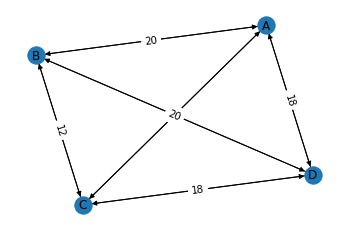

In [3]:
# On choisit aléatoirement n le nombre de sommets : 
#n = randint(4,6)
n=4
# Puis m le nombre de liens : 
m = n * (n-1)
    
# On crée une liste de tuples contenant les différents arcs : 
arcs = []
for i in range(n) :
    for j in range(n) :
        if i != j :
            arcs.append((string.ascii_uppercase[i],string.ascii_uppercase[j]))

# On crée un vecteur offre aléatoire qui contient l'offre (qui part de la source) et la demande (qui entre dans la destination)
off = [0] * n
offre_demande = randint(n,n*4)
idd = random.sample(range(n),2)

off[idd[0]] = offre_demande
off[idd[1]] = -off[idd[0]]

# Et le vecteur de capacités des arcs
cap = []
for i in range(m) :
    a = randint(offre_demande,offre_demande*2)
    cap.append(a)

print('Nombre de sommets :',n)    
print('Nombre de liens :',m) 
print('Liste des arcs :',arcs) 
print('Liste des offres pour chaque sommet :',off)         
print('Liste des capacités pour chaque lien :',cap)

G = nx.DiGraph()

#id_sommets = random.sample(range(n),2)       
#G.add_node(string.ascii_uppercase[id_sommets[0]], demand=off[idd[0]])
#G.add_node(string.ascii_uppercase[id_sommets[1]], demand=off[idd[1]])
G.add_node(string.ascii_uppercase[idd[0]], demand=off[idd[0]])
G.add_node(string.ascii_uppercase[idd[1]], demand=off[idd[1]])

print('La commodité observée est : (source=',string.ascii_uppercase[idd[0]],'destination=',\
      string.ascii_uppercase[idd[1]],'taille=',off[idd[0]],').')

for i in range(m) :
    G.add_edges_from([(arcs[i][0], arcs[i][1])], capacity=cap[i])

edge_labels=dict([((u,v,),d['capacity'])
                 for u,v,d in G.edges(data=True)])

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos, with_labels = True)

from math import sqrt
def Sqr(a):
    return a*a
def Distance(x1,y1,x2,y2):
    return sqrt(Sqr(y2-y1)+Sqr(x2-x1))


def factorielle(n):
    acc = 1
    for i in range(1,n+1) :
        acc = acc*i
    return(acc)

# on crée uns liste contenant les coûts
couts = []
for i in range(m) :
    couts.append(randint(1,n*2))

    
liste_chemins = []
acc1 = 0
while acc1 <= n-2 : 
    L = []
    for i in range(n) :
        L.append(string.ascii_uppercase[i])
    acc2 = 0
    if acc1 == 0 : 
        while acc2 < (factorielle(n-2)) :
            NoeudCourant = string.ascii_uppercase[idd[0]]
            NoeudFinal = string.ascii_uppercase[idd[1]]
            ListeDesNoeuds = list(NoeudCourant)
            Voisinage = []
            for i in range(len(L)) :
                if L[i] not in ListeDesNoeuds and L[i] != NoeudFinal :
                    Voisinage.append(L[i])
            while len(ListeDesNoeuds) < n-2 :
                VoisinAlea = random.choice(Voisinage)
                ListeDesNoeuds.append(VoisinAlea)
                NoeudCourant = VoisinAlea
                L = []
                for i in range(n) :
                    L.append(string.ascii_uppercase[i])
                Voisinage = []
                for i in range(len(L)) :
                    if L[i] not in ListeDesNoeuds and L[i] != NoeudFinal :
                        Voisinage.append(L[i])
            ListeDesNoeuds.append(NoeudFinal)
            if ListeDesNoeuds not in liste_chemins : 
                #print(ListeDesNoeuds)
                liste_chemins.append(ListeDesNoeuds)
                acc2 += 1
        acc1 += 1
    elif acc1 == n-2 : 
        ListeDesNoeuds = list(string.ascii_uppercase[idd[0]])
        ListeDesNoeuds.append(string.ascii_uppercase[idd[1]])
        #print(ListeDesNoeuds)
        liste_chemins.append(ListeDesNoeuds)
        acc1 +=1
    elif acc1 > 0 and acc1 < n-2 :
        while acc2 < (factorielle(n-2)/acc1) :
            NoeudCourant = string.ascii_uppercase[idd[0]]
            NoeudFinal = string.ascii_uppercase[idd[1]]
            ListeDesNoeuds = list(NoeudCourant)
            Voisinage = []
            for i in range(len(L)) :
                if L[i] not in ListeDesNoeuds and L[i] != NoeudFinal :
                    Voisinage.append(L[i])
            while len(ListeDesNoeuds) < n-acc1 :
                VoisinAlea = random.choice(Voisinage)
                ListeDesNoeuds.append(VoisinAlea)
                NoeudCourant = VoisinAlea
                L = []
                for i in range(n) :
                    L.append(string.ascii_uppercase[i])
                Voisinage = []
                for i in range(len(L)) :
                    if L[i] not in ListeDesNoeuds and L[i] != NoeudFinal :
                        Voisinage.append(L[i])
            ListeDesNoeuds.append(NoeudFinal)
            if ListeDesNoeuds not in liste_chemins : 
                #print(ListeDesNoeuds)
                liste_chemins.append(ListeDesNoeuds)
                acc2 += 1
        acc1 += 1

        
print('Liste des chemins possibles :',liste_chemins)


def min_utilisation_arc(n,m,chemins,demande,arcs,capacité,coût):
    capa = capacité
    flots = [0] * m # correspond aux flots utilisés sur l'ensemble du graph
    d = demande 
    acc1 = 0
    while d > 0 :
        CheminCourant = random.choice(chemins)
        for c in range(len(CheminCourant)-1): # on parcours chaque arc du chemin sélectionné
            acc = 0
            ArcCourant = (CheminCourant[c],CheminCourant[c+1]) 
            for a in range(len(arcs)) : # on cherche l'arc dans la liste des arcs et on trouve sa capacité associé 
                if ArcCourant == arcs[a] :
                    if capa[a] >= 1 : 
                        flots[a] = flots[a] + 1 
                        capa[a] = capa[a] - 1
                        acc = acc + 1 
            if acc != 0 :
                acc1 = 1
            else :
                acc1 = 0
        if acc1 == 1 :
            d = d - 1
    cout_total = 0
    for i in range(len(coût)):
        cout_total = cout_total + (flots[i]*coût[i])
    return (flots,couts,cout_total)

#min_utilisation_arc(n,m,liste_chemins,offre_demande,arcs,cap,couts)

def monte_carlo(fonction,x):
    a1 = fonction(n,m,liste_chemins,offre_demande,arcs,cap,couts)
    print(a1)
    a = a1[2]
    for i in range(x):
        b = fonction(n,m,liste_chemins,offre_demande,arcs,cap,couts)
        print(b)
        if b[2] < a and b[2] != 0 : 
            a = b[2]
    return (a)

monte_carlo(min_utilisation_arc,2)